## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot 

### Load dataset

Fashion-MNIST dataset


In [76]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [77]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

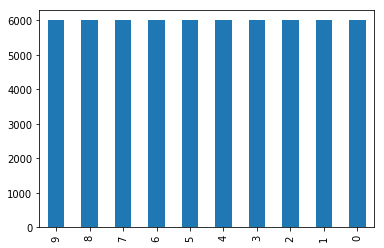

In [80]:
pd.Series(y_train).value_counts().plot(kind = 'bar')

In [18]:
y_train[0] #9 is ankle boot

9

In [21]:
X_train[0].shape

(28, 28)

In [38]:
#import numpy as np
#np.matrix(X_train[0])

In [22]:
#import cv2

#img = cv2.imread(r'D:\PERSONAL DATA\Pg25.png') # (H,W,color coordinate !)

In [23]:
#img.shape

In [41]:
# RGB # gray scale

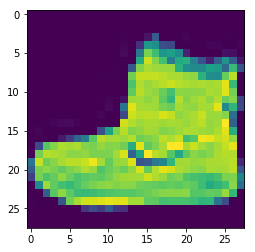

Label:  9


In [24]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

In [43]:
# label 9 is ankle boot

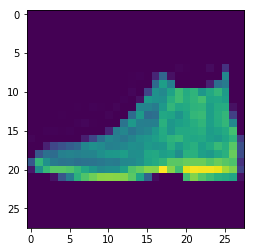

Label:  9


In [25]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [26]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

### Data Pre-processing

In [27]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1)) #.reshape(60000, 28*28)
X_test = X_test.reshape((X_test.shape[0], -1))

In [28]:
X_train.shape,y_train.shape

((60000, 784), (60000,))

In [29]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### Basic NN model

Naive MLP (multilayer perceptron) model without any alterations

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [32]:
import tensorflow as tf
tf.keras.backend.clear_session() 

In [33]:
model = Sequential()

In [34]:
model.add(Dense(units = 50, input_shape = (784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10)) # 10 labels
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [35]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
__________

In [37]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 1s 16us/sample - loss: 2.3290 - acc: 0.1024
Epoch 2/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.2975 - acc: 0.1689
Epoch 3/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.2950 - acc: 0.1656
Epoch 4/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.2925 - acc: 0.2352
Epoch 5/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.2899 - acc: 0.2461
Epoch 6/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.2869 - acc: 0.2928
Epoch 7/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.2834 - acc: 0.3132
Epoch 8/100
60000/60000 [==============================] - 1s 14us/sample - loss: 2.2794 - acc: 0.3388
Epoch 9/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.2748 - acc: 0.3766
Epoch 10/100
60000/60000 

60000/60000 [==============================] - 1s 14us/sample - loss: 0.7654 - acc: 0.7205
Epoch 78/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.7685 - acc: 0.7145
Epoch 79/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.7592 - acc: 0.7185
Epoch 80/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.7563 - acc: 0.7186
Epoch 81/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.7516 - acc: 0.7171
Epoch 82/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.7528 - acc: 0.7149
Epoch 83/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.7519 - acc: 0.7168
Epoch 84/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.7467 - acc: 0.7191
Epoch 85/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.7401 - acc: 0.7206
Epoch 86/100
60000/60000 [==============================] - 1s 15us/sample - 

In [0]:
results = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7735


### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In [0]:
# from now on, create a function to generate (return) models
def mlp_model():
    
    tf.keras.backend.clear_session() 
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 25us/sample - loss: 2.4123 - accuracy: 0.1000
Epoch 2/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3463 - accuracy: 0.1000
Epoch 3/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3188 - accuracy: 0.0999
Epoch 4/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3057 - accuracy: 0.0973
Epoch 5/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2991 - accuracy: 0.0966
Epoch 6/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2955 - accuracy: 0.1173
Epoch 7/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2935 - accuracy: 0.1644
Epoch 8/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2921 - accuracy: 0.1898
Epoch 9/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2910 - accuracy: 0.2368
Epoch

In [38]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.7453 - acc: 0.7302


In [40]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7302


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [41]:
# he_normal - didn't do good, reverting back to default glorot_init

In [42]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [43]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 1.8442 - acc: 0.6651
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5804 - acc: 0.7920
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5155 - acc: 0.8161
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4802 - acc: 0.8281
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4543 - acc: 0.8349
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4351 - acc: 0.8430
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4214 - acc: 0.8461
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4082 - acc: 0.8518
Epoch 9/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3975 - acc: 0.8547
Epoch 10/10
60000/60000 [==============================] - 3s 53us/sample - loss: 

In [44]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.4579 - acc: 0.8386


In [45]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8386


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [51]:
from tensorflow.keras.layers import BatchNormalization, Dropout

#### Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [52]:
# Relu gave good results, so we will resort RELU for activation
# including BatchNormalisation after every dense layer

In [53]:
def mlp_model():
    
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [55]:
model = mlp_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 50)                200       
_________________________________________________________________
activation_15 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 50)                200       
_________________________________________________________________
activation_16 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
__________

In [56]:
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)

Epoch 1/20
60000/60000 [==============================] - 5s 84us/sample - loss: 1.4394 - acc: 0.5522
Epoch 2/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.8819 - acc: 0.7368
Epoch 3/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.7322 - acc: 0.7673
Epoch 4/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6544 - acc: 0.7853
Epoch 5/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6053 - acc: 0.7995
Epoch 6/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5729 - acc: 0.8073
Epoch 7/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5489 - acc: 0.8137
Epoch 8/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.5289 - acc: 0.8178
Epoch 9/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5128 - acc: 0.8243
Epoch 10/20
60000/60000 [==============================] - 5s 77us/sample - loss: 

In [57]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.4036 - acc: 0.8560


In [58]:
print('Test accuracy: ', results[1])


Test accuracy:  0.856


In [ ]:
# tyically drop out layer is added after the activation layer

### Dropout

In [59]:
def mlp_model():
    
    tf.keras.backend.clear_session() 

    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [60]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.8490 - acc: 0.7072
Epoch 2/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.6092 - acc: 0.7923
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5488 - acc: 0.8126
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5204 - acc: 0.8231
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4897 - acc: 0.8324
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4839 - acc: 0.8344
Epoch 7/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4661 - acc: 0.8412
Epoch 8/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4616 - acc: 0.8409
Epoch 9/10
60000/60000 [==============================] - 6s 106us/

In [61]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3816 - acc: 0.8608


In [62]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8608


In [ ]:
##LIVE

In [63]:
def mlp_model():
    
    tf.keras.backend.clear_session() 

    model = Sequential()
    
    model.add(Dense(200, input_shape = (784, )))#, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100))#, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50))#, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50))#, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))#, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [64]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 10, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.6925 - acc: 0.7673 - val_loss: 0.4561 - val_acc: 0.8344
Epoch 2/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.5027 - acc: 0.8265 - val_loss: 0.4339 - val_acc: 0.8371
Epoch 3/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.4586 - acc: 0.8431 - val_loss: 0.3938 - val_acc: 0.8555
Epoch 4/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.4294 - acc: 0.8507 - val_loss: 0.3776 - val_acc: 0.8646
Epoch 5/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.4091 - acc: 0.8579 - val_loss: 0.3609 - val_acc: 0.8696
Epoch 6/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.3941 - acc: 0.8629 - val_loss: 0.3620 - val_acc: 0.8699
Epoch 7/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3775 - acc: 0.8683 - val_l

In [66]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])


10000/10000 [==============================] - 0s 41us/sample - loss: 0.3409 - acc: 0.8736
Test accuracy:  0.8736


In [65]:
# the effect of batch_size !! , use more epochs as well

In [67]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 10, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.7954 - acc: 0.7428 - val_loss: 0.4682 - val_acc: 0.8334
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4833 - acc: 0.8372 - val_loss: 0.4217 - val_acc: 0.8478
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4315 - acc: 0.8522 - val_loss: 0.4077 - val_acc: 0.8520
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3987 - acc: 0.8623 - val_loss: 0.3764 - val_acc: 0.8637
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3735 - acc: 0.8699 - val_loss: 0.3785 - val_acc: 0.8608
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3580 - acc: 0.8750 - val_loss: 0.3748 - val_acc: 0.8686
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3437 - acc: 0.8800 - val_loss: 0.

In [0]:
##lIVE here I have used he-normal initializer

In [68]:
def mlp_model():
    
    tf.keras.backend.clear_session()     
    model = Sequential()
    
    model.add(Dense(200, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [69]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 10, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.7284 - acc: 0.7570 - val_loss: 0.4456 - val_acc: 0.8356
Epoch 2/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.5131 - acc: 0.8246 - val_loss: 0.4376 - val_acc: 0.8377
Epoch 3/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.4652 - acc: 0.8390 - val_loss: 0.4077 - val_acc: 0.8544
Epoch 4/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4309 - acc: 0.8511 - val_loss: 0.3961 - val_acc: 0.8560
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.4080 - acc: 0.8582 - val_loss: 0.3747 - val_acc: 0.8625
Epoch 6/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3963 - acc: 0.8631 - val_loss: 0.3635 - val_acc: 0.8652
Epoch 7/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3801 - acc: 0.8668 - val_l

In [70]:
results = model.evaluate(X_test, y_test)
print(results)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3347 - acc: 0.8793
[0.3346599653959274, 0.8793]


In [71]:
# effect of batch size

In [72]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 200, epochs = 10, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2784 - acc: 0.9003 - val_loss: 0.3106 - val_acc: 0.8881
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2666 - acc: 0.9044 - val_loss: 0.3110 - val_acc: 0.8887
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2580 - acc: 0.9071 - val_loss: 0.3060 - val_acc: 0.8909
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2551 - acc: 0.9086 - val_loss: 0.3185 - val_acc: 0.8879
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2504 - acc: 0.9104 - val_loss: 0.3123 - val_acc: 0.8932
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2473 - acc: 0.9121 - val_loss: 0.3063 - val_acc: 0.8932
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2460 - acc: 0.9130 - val_loss: 0.

In [73]:
results = model.evaluate(X_test, y_test)
print(results)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3043 - acc: 0.8940
[0.30433595225811005, 0.894]


In [93]:
#observations:
# he_normal with batch_norm, dropout, more neurons and batch size seems to be peforming best
# glorot/he_normal, RELU, SGD, 200,100, 50,50, BN, DO = 0.2, batchwise
# (without batch_norm-dropout and less neurons, he_normal init lead to a score of 0.4 earlier, such is the impact of regularization
# and also the activation function RELU)

In [ ]:
#try:
# he normal intializer with batch_norm, dropout, more neurons and batch size 
# use he_normal with decay rate !!! #you can increase neurons also

In [ ]:
#df = pd.DataFrame([1,.....epochs--np.range(1,21)], [train_acc], [val_acc])